# Solutions for the Lane-Emden with $n=5$

In [9]:
from distutils.spawn import find_executable

import matplotlib.pyplot as plt
import numpy as np

import seaborn

rem = 16
ratio = 1.067

seaborn.set(context='notebook', style='darkgrid')

plt.ioff()

plt.rc('lines', linewidth=1)
plt.rc('font', family='serif')
plt.rc('font', size=rem)
plt.rc('axes', titlepad=(ratio**3)*rem)
plt.rc('axes', titlesize=(ratio**2)*rem)
plt.rc('axes', labelsize=ratio*rem)
plt.rc('legend', fontsize=1.000*rem)
plt.rc('xtick', labelsize=(ratio**-1)*rem)
plt.rc('ytick', labelsize=(ratio**-1)*rem)

if find_executable('latex'):
    plt.rc('text', usetex=True)
    
material_palette = {
    -1: "#212121",
    0: "#F44336",
    1: "#E91E63",
    2: "#9C27B0",
    3: "#673AB7",
    4: "#3F51B5",
    5: "#2196F3",
    6: "#03A9F4",
    7: "#00BCD4",
    8: "#009688",
    9: "#4CAF50",
    10: "#8BC34A",
    11: "#CDDC39",
    12: "#FFEB3B",
    13: "#FFC107",
    14: "#FF9800",
    15: "#FF5722",
}

In [10]:
%matplotlib inline

In [11]:
from sympy import (
    Eq as Equation,
    Derivative,
    Function,
    Symbol,
    Dummy,
    discriminant,
    integrate,
    FiniteSet,
    Interval,
    solveset, 
    simplify,
    symbols,
    dsolve,
    factor,
    solve,
    sqrt,
    exp,
    ln,
    oo,
    S,
    Abs,
    I,
)
from sympy.assumptions.assume import assuming
from sympy.assumptions import Q, ask

In [12]:
n = Symbol("n")
xi = Symbol("xi")
theta = Function("theta")

In [13]:
lhs = simplify((1 / xi ** 2) * Derivative((xi ** 2) * Derivative(theta(xi), xi), xi).doit())
lhs

Derivative(theta(xi), (xi, 2)) + 2*Derivative(theta(xi), xi)/xi

In [14]:
rhs = -theta(xi) ** n
rhs

-theta(xi)**n

In [15]:
lane_endem_eq = Equation(lhs, rhs)
lane_endem_eq

Eq(Derivative(theta(xi), (xi, 2)) + 2*Derivative(theta(xi), xi)/xi, -theta(xi)**n)

In [16]:
lane_endem_eq_5 = lane_endem_eq.subs(n, 5)
lane_endem_eq_5

Eq(Derivative(theta(xi), (xi, 2)) + 2*Derivative(theta(xi), xi)/xi, -theta(xi)**5)

## The autonomous form of Lane-endem equation

In [17]:
z = Function('z')
t = Symbol('t')
C = Dummy('C')

In [18]:
t_change = Equation(t, -ln(xi))
t_change

Eq(t, -log(xi))

In [19]:
xi_change = Equation(xi, exp(-t))
xi_change

Eq(xi, exp(-t))

In [20]:
theta_change = Equation(
    theta(xi),
    (z(xi) / sqrt(2 * xi)).replace(
        z(xi), z(t)
    ).replace(
        xi_change.lhs, xi_change.rhs
    ).replace(
        1 / sqrt(exp(-t)), exp(t/2)
    )
).simplify()
theta_change

Eq(theta(xi), sqrt(2)*z(t)*exp(t/2)/2)

In [21]:
d_theta_change = Equation(
    Derivative(
        theta_change.lhs, 
        xi
    ), 
    - exp(t) * Derivative(
        theta_change.rhs,
        t
    ).doit().simplify()
)
d_theta_change

Eq(Derivative(theta(xi), xi), -sqrt(2)*(z(t) + 2*Derivative(z(t), t))*exp(3*t/2)/4)

In [22]:
d2_theta_change = Equation(
    Derivative(
        d_theta_change.lhs, 
        xi
    ), 
    - exp(t) * Derivative(
        d_theta_change.rhs,
        t
    ).doit().simplify()
).simplify()
d2_theta_change

Eq(Derivative(theta(xi), (xi, 2)), sqrt(2)*(3*z(t)/8 + Derivative(z(t), t) + Derivative(z(t), (t, 2))/2)*exp(5*t/2))

In [23]:
autonomus_lane_endem_eq_5 = lane_endem_eq_5.replace(
    d2_theta_change.lhs, 
    d2_theta_change.rhs 
).replace(
    d_theta_change.lhs, 
    d_theta_change.rhs 
).replace(
    theta_change.lhs, 
    theta_change.rhs 
).replace(
    xi_change.lhs, 
    xi_change.rhs 
).simplify()
autonomus_lane_endem_eq_5

Eq(sqrt(2)*z(t)**5*exp(5*t/2)/8, -sqrt(2)*(-z(t) + 4*Derivative(z(t), (t, 2)))*exp(5*t/2)/8)

In [24]:
autonomus_lane_endem_eq_5 = Equation(
    - 1 * (autonomus_lane_endem_eq_5.rhs * exp( - 5 * t / 2) * 8 / sqrt(2) - z(t)) / 4,
    - 1 * (autonomus_lane_endem_eq_5.lhs * exp( - 5 * t / 2) * 8 / sqrt(2) - z(t)) / 4
).simplify()
autonomus_lane_endem_eq_5

Eq(Derivative(z(t), (t, 2)), (1 - z(t)**4)*z(t)/4)

In [22]:
dz_lane_endem_eq_5 = Equation(
    integrate(
        Derivative(
            Derivative(
                z(t),
                t
            ) ** 2,
            t
        ), 
    t),
    integrate(
        Derivative(
            Derivative(
                z(t),
                t
            ) ** 2,
            t
        ).doit().replace(
            autonomus_lane_endem_eq_5.lhs,
            autonomus_lane_endem_eq_5.rhs
        ),
        t
    ) + C / 12
)
dz_lane_endem_eq_5

Eq(Derivative(z(t), t)**2, _C/12 - z(t)**6/12 + z(t)**2/4)

## Discriminant analisys of the polinomial asociated to the Autonomous Lane-Endem Equation

In [23]:
w_C = Function('w_C')

wc_lane_endem_eq_5 = Equation(
    w_C(z(t)),
    12 * dz_lane_endem_eq_5.rhs
)
wc_lane_endem_eq_5

Eq(w_C(z(t)), _C - z(t)**6 + 3*z(t)**2)

In [24]:
f_C = Function('f_C')
u = Symbol('u')

fc_lane_endem_eq_5 = Equation(
    f_C(u),
    wc_lane_endem_eq_5.rhs.replace(
        z(t)**2, u
    ).replace(
        z(t)**6, u**3
    )
)
fc_lane_endem_eq_5

Eq(f_C(u), _C - u**3 + 3*u)

In [25]:
fc_discriminant = discriminant(
    fc_lane_endem_eq_5.rhs, 
    u
)
fc_discriminant

108 - 27*_C**2

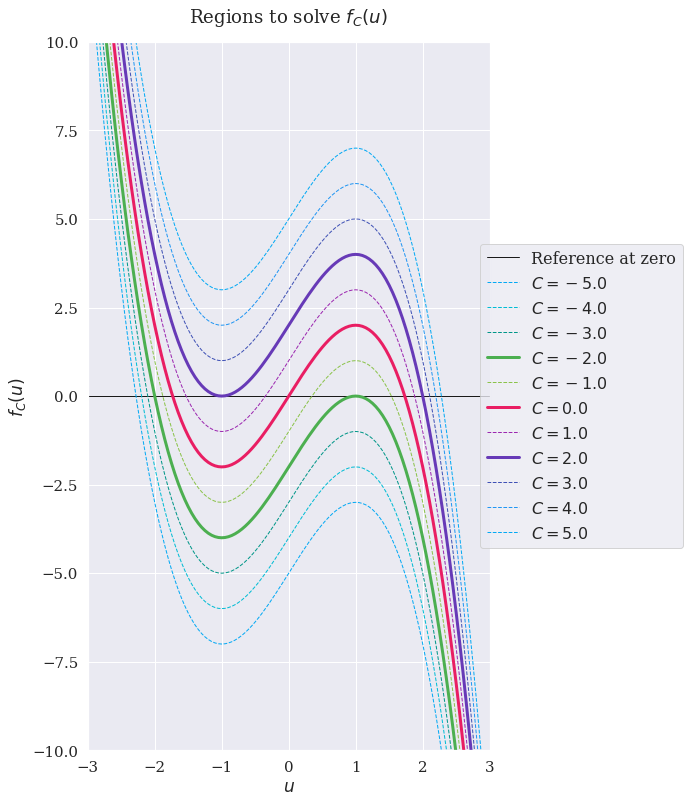

In [26]:
n_u = np.linspace(-5, 5, 201)
n_c = np.linspace(-5, 5, 11)

def p(u, c):
    return - u**3 + 3 * u + c

fig = plt.figure(figsize=(11.25, 11.25), frameon=False)
axs = fig.add_subplot(1,1,1)

axs.plot(
    n_u, 
    n_u * 0, 
    linestyle='-', 
    linewidth=1,
    color='k',
    label=r"Reference at zero")

for c in n_c:
    line_width = 1
    line_style = '--'
    
    if c in [-2, 0, 2]:
        line_width = 3
        line_style = '-'
        
    axs.plot(
        n_u, 
        p(n_u, c), 
        color=material_palette[c%10 + 1],
        linestyle=line_style, 
        linewidth=line_width,
        label=r"$C={}$".format(c))

axs.legend(
    loc='center right', 
    bbox_to_anchor=(1.5, 0.5)
)
axs.set_title(r"Regions to solve $f_C(u)$")
axs.set_xlim([-3, 3])
axs.set_xlabel(r"$u$")
axs.set_ylim([-10, 10])
axs.set_ylabel(r"$f_C(u)$")
plt.tight_layout()
plt.show()

## Solutions for $u > 0$

### Case 1: $C < -2$

* $f_C(u)$ is negative
* No real solutions for $u$!
* No real solutions for $z(t)$!

### Case 2: $C = −2$

* $f_C(u)$ has one root for $u=1$
* Two real solutions for $z(t)$

The polynomial $w(z)$ can be factorized as

In [22]:
factor(
    wc_lane_endem_eq_5.rhs.subs(
        C, -2
    ), 
    z(t)
)

-(z(t) - 1)**2*(z(t) + 1)**2*(z(t)**2 + 2)

* The real solutions for this equations are

In [67]:
solutions = solveset(
    factor(
        wc_lane_endem_eq_5.rhs.subs(
            C, -2
        ), 
        z(t)
    ),
    z(t),
    domain=S.Reals
)
solutions

FiniteSet(-1, 1)

* Then, the values for $\theta(\xi)$ are

In [68]:
FiniteSet(
    *[
        theta_change.replace(
            z(t), z_vaue
        ).replace(
            t_change.lhs, t_change.rhs
        ).rhs
        for z_vaue in solutions
    ]
)

FiniteSet(-sqrt(2)/(2*sqrt(xi)), sqrt(2)/(2*sqrt(xi)))

### Case 3: $-2 < C < 0$

* The polynomial $f_C(u)$ has 2 positive solutions
* This guive us four values for $z(t)$

In [25]:
fc_lane_endem_eq_5

Eq(f_C(u), _C - u**3 + 3*u)

In [70]:
from IPython.display import display
from sympy.assumptions import Q, ask
from sympy.assumptions.assume import assuming
from sympy import Abs, I

with assuming(Q.is_true(-2 < C), Q.is_true(C < 0), Q.negative(C)):
    solutions = solveset(
        fc_lane_endem_eq_5.rhs, 
        u
    )
    solutions = [
        solution.expand().simplify() for solution in solutions
    ]

for i, solution in enumerate(solutions):
    _u = Symbol(f"u_{i}")
    display(Equation(_u, solution))

Eq(u_0, -2**(2/3)*(-_C + sqrt(_C**2 - 4))**(1/3)/2 - 2**(1/3)/(-_C + sqrt(_C**2 - 4))**(1/3))

Eq(u_1, 2**(1/3)*(2**(1/3)*(1 + sqrt(3)*I)**2*(-_C + sqrt(_C**2 - 4))**(2/3) + 8)/(4*(1 + sqrt(3)*I)*(-_C + sqrt(_C**2 - 4))**(1/3)))

Eq(u_2, 2**(1/3)*(2**(1/3)*(1 - sqrt(3)*I)**2*(-_C + sqrt(_C**2 - 4))**(2/3) + 8)/(4*(1 - sqrt(3)*I)*(-_C + sqrt(_C**2 - 4))**(1/3)))

In [44]:
from sympy import lambdify

_x = Symbol("x")

num_u_solutions = [
    lambdify(
        _x, 
        solution.replace(
            C, _x
        ), 
        "numpy"
    ) for solution in solutions
]

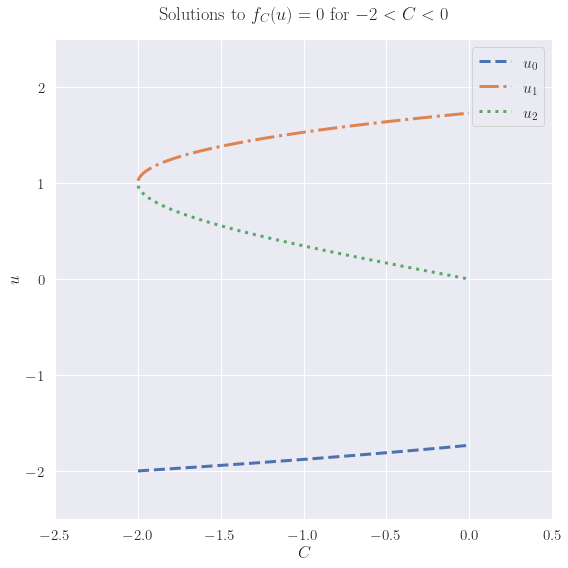

In [71]:
n_c = np.linspace(-2, 0, 1001) + 0j
n_c = n_c[1:-1]

fig = plt.figure(figsize=(8, 8), frameon=False)
axs = fig.add_subplot(1,1,1)

for i, num_u_solution in enumerate(num_u_solutions):
    axs.plot(
        np.real(n_c),
        np.real(num_u_solution(n_c)),
        linewidth=3,
        linestyle=(["--", "-.", ":"])[i],
        label=f"$u_{i}$"
    )

axs.set_title(r"Solutions to $f_C(u) = 0$ for $-2 < C < 0$")
axs.set_xlim([-2.5, 0.5])
axs.set_xlabel(r"$C$")
axs.set_ylim([-2.5, 2.5])
axs.set_ylabel(r"$u$")
axs.legend()
fig.tight_layout()
plt.show()

In the previous plot we only have plotted real part of the solution, because, as we can see at the following plot, the imaginary part is result of numerical computation due to round off errors.

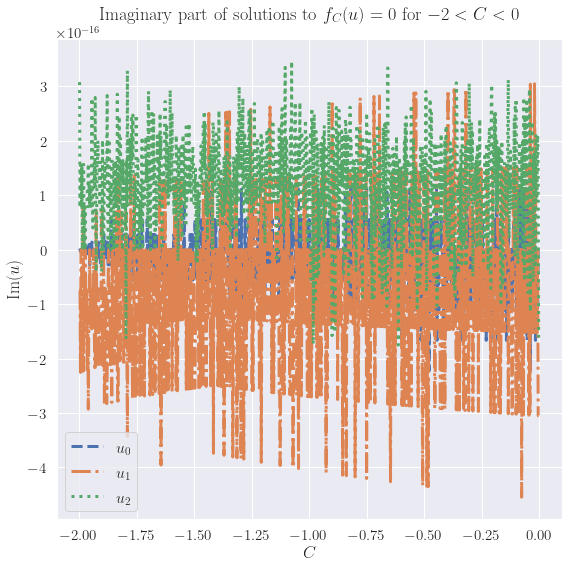

In [79]:
n_c = np.linspace(-2, 0, 1001) + 0j
n_c = n_c[1:-1]

fig = plt.figure(figsize=(8, 8), frameon=False)
axs = fig.add_subplot(1,1,1)

for i, num_u_solution in enumerate(num_u_solutions):
    axs.plot(
        np.real(n_c),
        np.imag(num_u_solution(n_c)),
        linewidth=2,
        linestyle=(["--", "-.", ":"])[i],
        label=f"$u_{i}$"
    )

axs.set_title(r"Imaginary part of solutions to $f_C(u) = 0$ for $-2 < C < 0$")
# axs.set_xlim([-2.5, 0.5])
axs.set_xlabel(r"$C$")
# axs.set_ylim([-2.5, 2.5])
axs.set_ylabel(r"$\mathrm{Im}(u)$")
axs.legend()
fig.tight_layout()
plt.show()

Making:

* $a = u_2$
* $b = u_1$
* $c = -u_0$

With

$$
0 < a < 1 < b < \sqrt{3} < c <  2
$$

We can express the factorization of $f_C(u)$ as

$$f_C(u) = (u - a)(b - u)(u + c)$$

In [85]:
from sympy import Poly, Pow

a = Symbol("a")
b = Symbol("b")
c = Symbol("c")

factorized_fc_lane_endem_eq_5 = Equation(
    f_C(u),
    (u - a)*(b - u)*(u + c)
)
factorized_fc_lane_endem_eq_5

Eq(f_C(u), (-a + u)*(b - u)*(c + u))

This leads us to the integral

In [98]:
from sympy import sqrt, Integral

z_ = Symbol("z")
pm = Symbol("±")

Equation(
    Integral(
        1 / sqrt(
            factorized_fc_lane_endem_eq_5.rhs.replace(u, z_**2)
        ),
        z_
    ),
    pm * Integral(
        1 / (2 * sqrt(3)),
        t
    ),
)

Eq(Integral(1/sqrt((-a + z**2)*(b - z**2)*(c + z**2)), z), ±*Integral(sqrt(3)/6, t))

For our interest, this integral wil be solved on $\sqrt{a} < |z| < \sqrt{b}$

In [101]:
x = Symbol("x")

x_change = Equation(x, z_ / sqrt(z_**2 - a))
x_change

Eq(x, z/sqrt(-a + z**2))

Solving for $z^2$

In [130]:
solveset(
    Equation(x, sqrt(u) / sqrt(u - a)),
    u,
)

Complement(FiniteSet(a*x**2/((x - 1)*(x + 1))), FiniteSet(a))

In [224]:
dx_change = Equation(
    Derivative(x_change.lhs, z_),
    Derivative(x_change.rhs, z_).doit().replace(
        z_**2, 
        a * (x ** 2) / (x**2 - 1)
    ).expand().simplify(),
)
dx_change

Eq(Derivative(x, z), (1 - x**2)/sqrt(a/(x**2 - 1)))

With this change of variables, we obtain the integral

In [161]:
(
    sqrt(
        (1 / factorized_fc_lane_endem_eq_5.rhs).replace(
            u - a,
            a * (x ** 2) / ((x - 1) * (x + 1))
        ).expand()
    ) / (
        (1 - x**2) * sqrt(x**2 - 1) / a
    ).expand()
).expand()

sqrt(x**2/(a*b*c*x**2 + a*b*u*x**2 - a*c*u*x**2 - a*u**2*x**2) - 1/(a*b*c*x**2 + a*b*u*x**2 - a*c*u*x**2 - a*u**2*x**2))/(-x**2*sqrt(x**2 - 1)/a + sqrt(x**2 - 1)/a)

In [223]:
from sympy import factor, cancel

factor(
    sqrt(1 / factorized_fc_lane_endem_eq_5.rhs).replace(
        u - a,
        u / x ** 2
    ).replace(
        u,
        a * (x ** 2) / (x**2 - 1)
    ).simplify()
)

sqrt(-(x - 1)**3*(x + 1)**3/(a**3*x**4 - a**2*b*x**4 + a**2*b*x**2 + a**2*c*x**4 - a**2*c*x**2 - a*b*c*x**4 + 2*a*b*c*x**2 - a*b*c))

In [226]:
Derivative(z_ / sqrt(z_**2 - a), z_).doit()

-z**2/(-a + z**2)**(3/2) + 1/sqrt(-a + z**2)

integrate(a, a, (a, 0, 1))

In [73]:
coeffs_fc = Poly(fc_lane_endem_eq_5.rhs, u).all_coeffs()
coeffs_fc

[-1, 0, 3, _C]

In [74]:
a = Symbol("a")
b = Symbol("b")
c = Symbol("c")

factor_coeffs_fc = Poly(-(u + a)*(b + u)*(u + c), u).all_coeffs()
factor_coeffs_fc

[-1, -a - b - c, -a*b - a*c - b*c, -a*b*c]

In [75]:
coeffs_eqn = [
    Equation(factor_coeff, coeff) for factor_coeff, coeff in zip(
        factor_coeffs_fc[1:],
        coeffs_fc[1:],
    )
]

In [76]:
solutions = solve(
    coeffs_eqn, 
    a,
    b, 
    c
)

In [77]:
solutions = [
    [
        item.expand().simplify()
        for item in solution
    ]
    for solution in solutions
]

In [10]:
solution = dsolve(lane_endem_eq_1, theta(xi))
solution

Eq(theta(xi), (C1*besselj(1/2, xi) + C2*bessely(1/2, xi))/sqrt(xi))

In [11]:
constants = solve(
    [
        simplify(xi * solution.rhs).subs(xi, 0),
        Derivative(simplify(xi * solution.rhs), xi).doit().subs(xi, 0) - 1,
    ],
    symbols('C1 C2'),
)
constants

{C1: sqrt(2)*sqrt(pi)/2, C2: 0}

In [12]:
solution = solution.subs(constants)
solution

Eq(theta(xi), sqrt(2)*sqrt(pi)*besselj(1/2, xi)/(2*sqrt(xi)))

In [14]:
solution = solution.simplify()
solution

Eq(theta(xi), sin(xi)/xi)

In [15]:
theta_zeros = solve(solution.rhs, xi)
theta_zeros

[pi]

In [16]:
num_theta_f = lambdify(xi, solution.rhs, "numpy")

NameError: name 'lambdify' is not defined

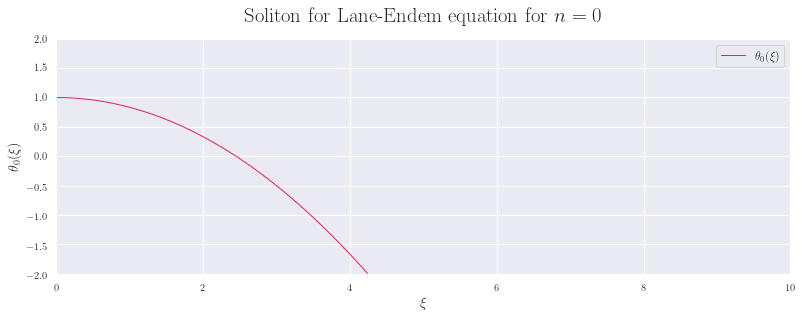

In [14]:
n_xi = np.linspace(0, 10, 101)
n_theta = num_theta_f(n_xi)

fig = plt.figure(figsize=(11.25, 4.5), frameon=False)
axs = fig.add_subplot(1, 1, 1)

axs.plot(
    n_xi, 
    n_theta, 
    color=material_palette[1],
    label=r"$\theta_0(\xi)$"
)
axs.legend()
axs.set_title(r"Soliton for Lane-Endem equation for $n=0$")
axs.set_xlim([0, 10])
axs.set_xlabel(r"$\xi$")
axs.set_ylim([-2, 2])
axs.set_ylabel(r"$\theta_0(\xi)$")
plt.tight_layout()
plt.show()